# Example of One Variable Forecasting using LSTM

Suryasatriya Trihandaru


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
t = np.array(range(1000))
x = np.sin(0.02*t)*np.exp(0.001*t)+ np.random.random(len(t))
x=x/max(x)

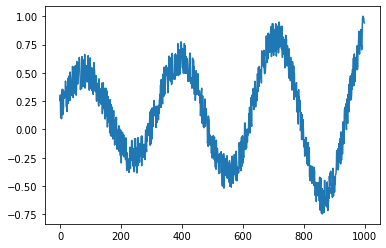

In [3]:
plt.plot(t,x)

In [4]:
NDATA=len(x)
SEQ_LEN=100 
NUM_SAMPLING = NDATA - SEQ_LEN
X=[]
Y=[]
for i in range(NUM_SAMPLING):
    X.append(x[i:i+SEQ_LEN])
    Y.append(x[i+SEQ_LEN])
X=np.array(X)
Y=np.array(Y)
X=X.reshape(-1,1,SEQ_LEN)
Y=Y.reshape(-1,1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=128, return_sequences=True, input_shape =(1,SEQ_LEN) ))
model.add(tf.keras.layers.Dropout(0.1)) 
model.add(tf.keras.layers.LSTM(units=64))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            117248    
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 166,721
Trainable params: 166,721
Non-trainable params: 0
_________________________________________________________________


In [6]:
hasil=model.fit(X,Y, epochs=100, verbose=0)

In [7]:
pred=model.predict(X)

29/29 [==============================] - 2s 4ms/step


In [8]:
print(pred.shape, Y.shape)

(900, 1) (900, 1)


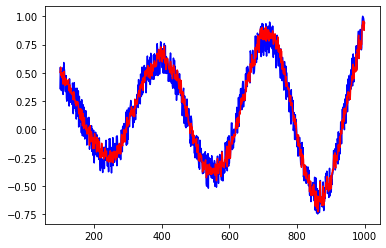

In [9]:
plt.plot(t[SEQ_LEN:], Y, c='b')
plt.plot(t[SEQ_LEN:], pred, c='r')
plt.show()

In [10]:
lastX = X[-1].ravel()
lastpred = model.predict(lastX.reshape(1,1,SEQ_LEN))
future=[]
tnew =[]
dt=t[1]-t[0]
nextX=np.hstack((lastX[1:],lastpred[0]))
for i in range(SEQ_LEN*10):  
    p = model.predict(nextX.reshape(1,1,SEQ_LEN), verbose=0)
    future.append(p)
    tnew.append((i+1)*dt+t[-1])
    nextX=np.hstack((nextX[1:],p[0]))
    

1/1 [==============================] - 0s 57ms/step


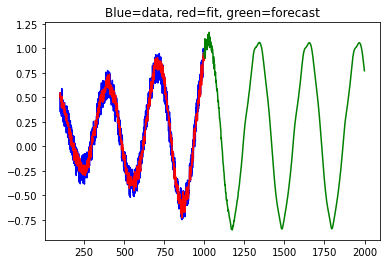

In [11]:
future=np.array(future).ravel()

plt.plot(t[SEQ_LEN:], Y, c='b')
plt.plot(t[SEQ_LEN:], pred, c='r')
plt.plot(tnew,future,c='g')
plt.title('Blue=data, red=fit, green=forecast')
plt.show()